# Simple Linear Regression Model

In [6]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dataset = pd.read_csv('../data/housing/data.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Simple Linear Regression

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

### Referring to the association between LSTAT and MEDV, a simple linear regression model is to be created for estimating the values of $B_0$ and $B_1$ (intercept and slope).

7      6.756
20    -5.540
100    6.046
Name: observederror, dtype: float64


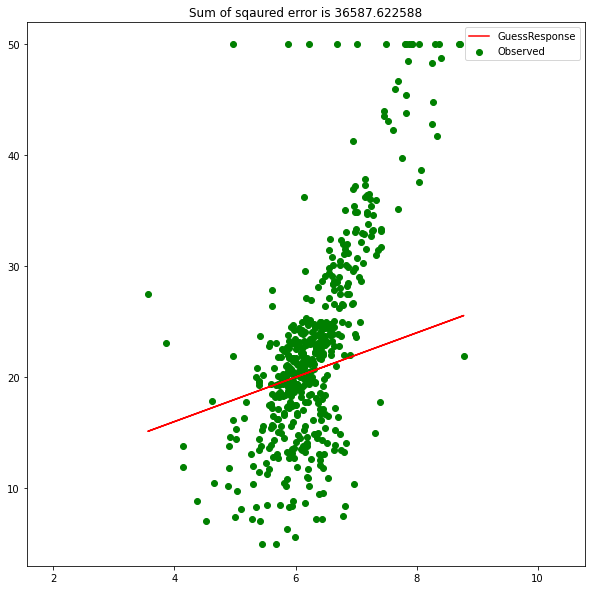

In [8]:
# try to set the value of b0 and b1 to get a straight line
b0 = 8
b1 = 2
dataset['GuessResponse'] = b0 + b1*dataset['RM']
 
# try to get the error of the guess...
# for showing how far our guess response is from the true response
dataset['observederror'] = dataset['MEDV'] - dataset['GuessResponse']
indices = [7, 20, 100]
print(dataset['observederror'].loc[indices])

# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((dataset['observederror'])**2)).sum()))
plt.scatter(dataset['RM'], dataset['MEDV'], color='g', label='Observed')
plt.plot(dataset['RM'], dataset['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(dataset['RM'].min()-2, dataset['RM'].max()+2)
plt.ylim(dataset['MEDV'].min()-2, dataset['MEDV'].max()+2)
plt.show()

# Least Squared Estimates

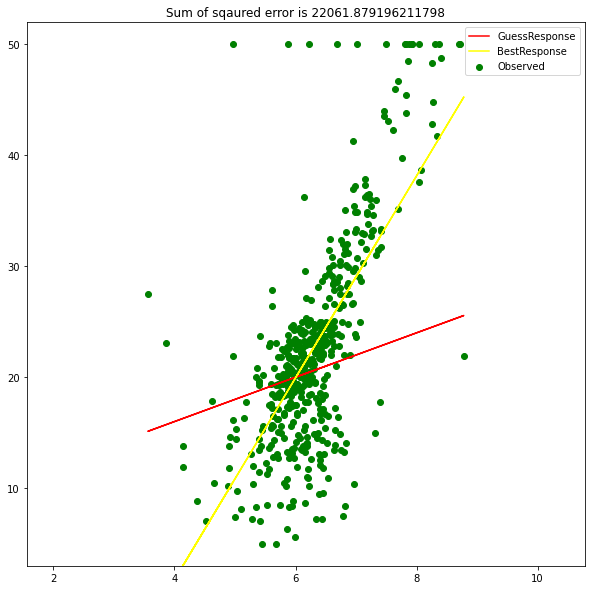

In [5]:
# Input the formula
formula = 'MEDV~RM'
# OLS = Ordinary Least Square estimation
model = smf.ols(formula=formula, data=dataset).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]

dataset['BestResponse'] = b0_ols + b1_ols*dataset['RM']

# Also want to know the error of the guess...
dataset['error'] = dataset['MEDV'] - dataset['BestResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((dataset['error'])**2)).sum()))
plt.scatter(dataset['RM'], dataset['MEDV'], color='g', label='Observed')
plt.plot(dataset['RM'], dataset['GuessResponse'], color='red', label='GuessResponse')
plt.plot(dataset['RM'], dataset['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(dataset['RM'].min()-2, dataset['RM'].max()+2)
plt.ylim(dataset['MEDV'].min()-2, dataset['MEDV'].max()+2)
plt.show()

# Summary Table

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           2.49e-74
Time:                        02:51:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""